# Run UDFs on Merlin live streams

If you want to use this with the simulated data source, run something like this in the background:

`libertem-live-mib-sim ~/Data/default.hdr --cached=MEMFD` 

Make sure to adjust the `SCAN_SIZE` below to match the scan of the simulated data source.

In [1]:
# set this to the host/port where the merlin data server is listening:
MERLIN_DATA_SOCKET = ('127.0.0.1', 6342)
SCAN_SIZE = (186, 357)

In [2]:
%matplotlib nbagg

In [3]:
import time
import logging
from contextlib import contextmanager

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
from libertem.udf.sum import SumUDF
from libertem.udf.stddev import StdDevUDF
from libertem.udf.sumsigudf import SumSigUDF

In [7]:
from libertem_live.detectors.merlin import MerlinDataSource
from libertem_live.detectors.merlin.dataset import LiveDataSet
from libertem_live.api import LiveContext

In [8]:
def make_medipix_setup(data_source):
    @contextmanager
    def medipix_setup(dataset, udfs):
        print("priming camera for acquisition")
        # TODO: medipix control socket commands go here
        
        # mer.set('numframes', 1024)
        # mer.set(...)
        
        # microscope.start_scanning()
        
        with data_source:
            yield
        print("camera teardown")
    return medipix_setup

In [17]:
data_source = MerlinDataSource(host=MERLIN_DATA_SOCKET[0], port=MERLIN_DATA_SOCKET[1], pool_size=3)
ds = LiveDataSet(
    scan_size=SCAN_SIZE,
    data_source=data_source,
    frames_per_partition=8*SCAN_SIZE[1],
)
ds = ds.initialize(None)  # TODO: integrate into LiveContext.load or how it will be called
ctx = LiveContext(camera_setup=make_medipix_setup(data_source))

In [18]:
# udfs = [SumUDF(), SumSigUDF(), StdDevUDF()]
# udfs = [SumUDF(), SumSigUDF()]
udfs = [SumUDF(), SumSigUDF()]

In [19]:
from libertem.viz.mpl import MPLLivePlot

In [20]:
from libertem.viz.bqp import BQLivePlot

<IPython.core.display.Javascript object>


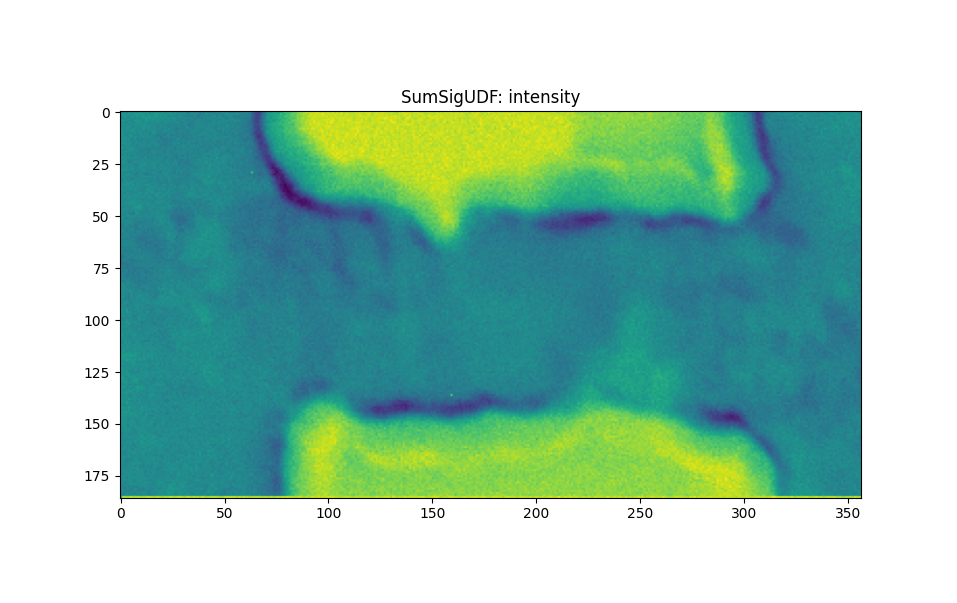

In [21]:
p1 = MPLLivePlot(ds, udfs[1])

In [23]:
p0 = BQLivePlot(ds, udfs[1])

In [24]:
p0.display()

Figure(axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0)), Axis(label='y', orientation='vertical', sca…

In [25]:
ctx.run_udf(dataset=ds, udf=udfs[1], plots=[p0, p1])

priming camera for acquisition
camera teardown


({'intensity': <BufferWrapper kind=nav dtype=float32 extra_shape=()>},)